# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
#()

#### Data Generation

In [3]:
# Data generation

np.random.seed(seed = 3)

#data of Gaussian Distributions
#distribution 1
mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T
#mean, covariance, points.

#distribution 2
mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T
#mean, covariance, points.

In [4]:
#hstack stacks along the first axis.
#vstack stacks along the second axis.
#dstack stacks along the third axis.

#Generating the x-y plane:
x, y = np.mgrid[-10:10.1:0.1, -10:10.1:0.1]
plane = np.dstack((x, y))

#Using Naive Gaussian to assign classes to the data.
data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
labels = np.hstack((np.zeros(100),np.ones(100)))
model_sk = GaussianNB(priors = None)
model_sk.fit(data,labels)

#Modelling the distributions as random variables.
randVar1 = scipy.stats.multivariate_normal(mu1, sigma1)
randVar2 = scipy.stats.multivariate_normal(mu2, sigma2)

#Creating the Optimal Gaussian classifier
xy_coordinates = plane.reshape([np.prod(x.shape), 2])
probability_class1 = randVar1.pdf(xy_coordinates)
probability_class2 = randVar2.pdf(xy_coordinates)


In [5]:

#Classifying points using the naive bayes classifier
Z_n = model_sk.predict(xy_coordinates)
Z_naive = Z_n.reshape(x.shape)

#Classifying points using the optimal bayes classifer
#If the value of the logaritham is less than 0 then it's classified as class 1
#Else the data point is classified as class 2.
#We're neglecting the denominator values as they're the same for both expressions.
#We do not include P(Class1) or P(Class2) in our calculations 
#as there is an equal number of data points from class 1 and class 2. Thus they have the same priori probabilities.
Z_o = (np.sign(np.log(np.divide(probability_class2, probability_class1)))+1)/2
Z_optimal = Z_o.reshape(x.shape)


#### Excercise: A) Plot the decision boundary

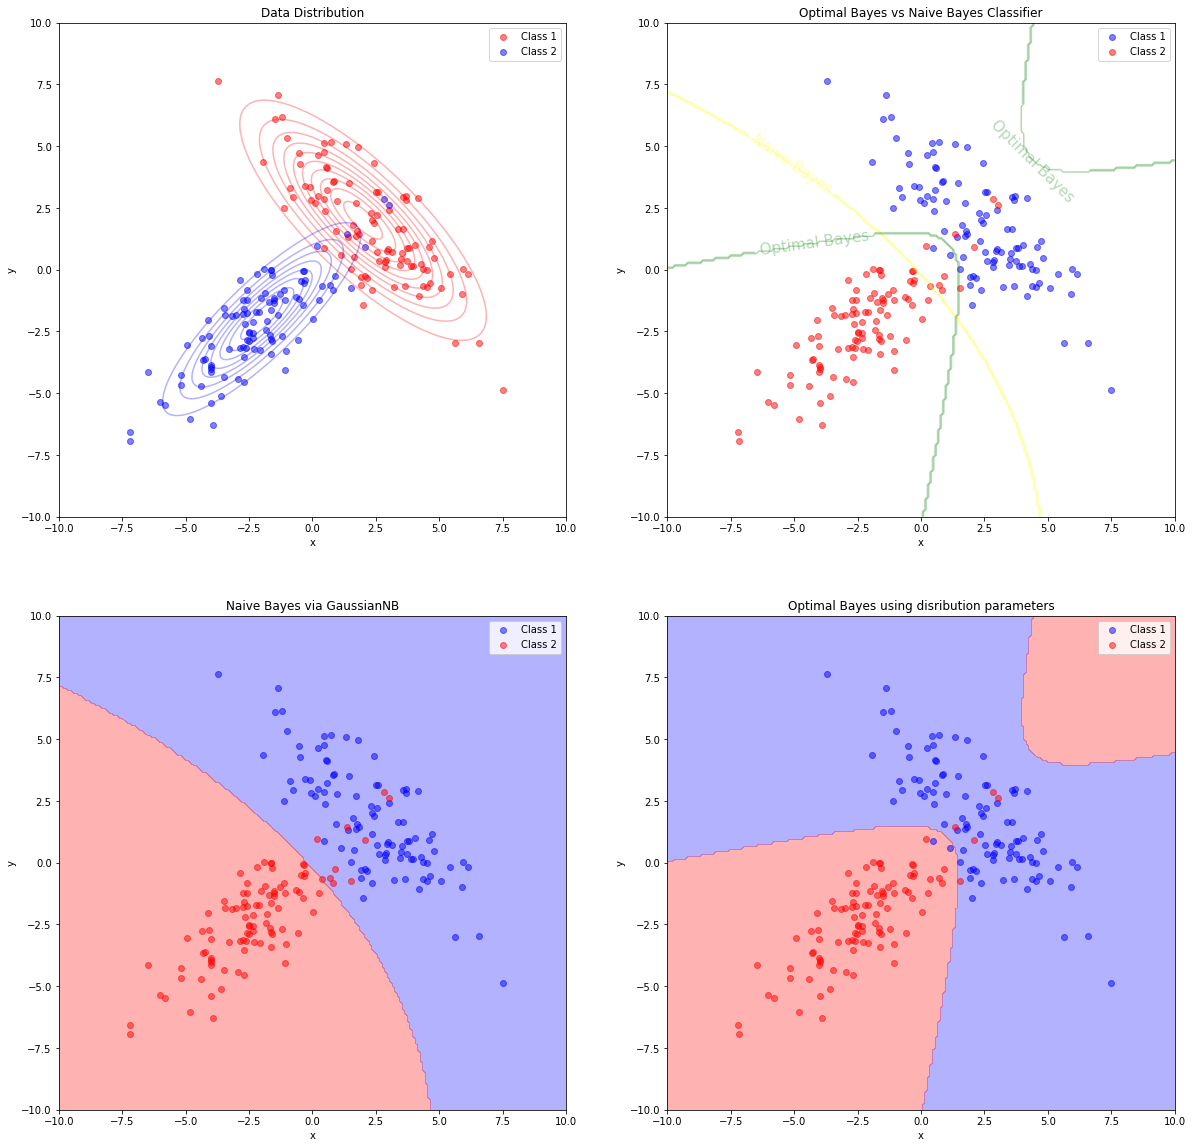

In [41]:

fig = plt.figure(figsize = (20, 20))

plot = fig.add_subplot(221)
plot.set_title('Data Distribution')

plot.contour(x,y,randVar1.pdf(plane), 10, alpha = .3, colors = 'red')
plot.contour(x,y,randVar2.pdf(plane), 10, alpha = .3, colors = 'blue')
#The closer the concentric circles, the more dense the distribution.

plot.scatter(x1, y1, alpha = .5, c = 'red', label = "Class 1")
plot.scatter(x2, y2, alpha = .5, c = 'blue', label = "Class 2")
#Generating a scatter plot of the data

plot.set_xlabel('x')
plot.set_ylabel('y')
plt.legend()


plot = fig.add_subplot(222)
plot.set_title('Optimal Bayes vs Naive Bayes Classifier' )

naiveBayes = plot.contour( x, y, Z_naive, 1, alpha = 0.3, colors = 'yellow')
optimalBayes = plot.contour( x, y, Z_optimal, 1, alpha = 0.3, colors = 'green')
#Shows the decision boundary for the classifiers

plot.clabel(naiveBayes, naiveBayes.levels[ : : 2], inline = True, fmt = "Naive Bayes", fontsize=15)
plot.clabel(optimalBayes, optimalBayes.levels[ : : 2], inline = True, fmt = "Optimal Bayes", fontsize=15)
#Labelling the decision boundary

plot.scatter(x1, y1, alpha = .5 ,c = 'blue',label = "Class 1")
plot.scatter(x2, y2, alpha = .5 ,c = 'red' ,label = "Class 2")
#Visualising the data as a scatter plot.

plot.set_xlabel('x')
plot.set_ylabel('y')
plt.legend()


plot = fig.add_subplot(223)
plot.set_title('Naive Bayes via GaussianNB')

plot.contourf( x, y, Z_naive, 1, alpha = .3, colors = ('blue','red'))
plot.scatter(x1, y1, alpha = .5, c = 'blue',label = "Class 1")
plot.scatter(x2, y2, alpha = .5, c = 'red',label = "Class 2")
#The highlight colour of the grid shows which class the space belongs to.

plot.set_xlabel('x')
plot.set_ylabel('y')
plt.legend()


plot = fig.add_subplot(224)
plot.set_title('Optimal Bayes using disribution parameters')

plot.contourf( x, y, Z_optimal, 1, alpha = .3, colors = ('blue','red'))
plot.scatter(x1, y1, alpha = .5, c = 'blue', label = "Class 1")
plot.scatter(x2, y2, alpha = .5, c = 'red', label = "Class 2")
#The highlight colour of the grid shows which class the space belongs to.

plot.set_xlabel('x')
plot.set_ylabel('y')
plt.legend()

plt.show()

#### Excercise: B) Accuracies

In [49]:

#Optimal Bayes accuracy
p11 = randVar1.pdf(data)
p12 = randVar2.pdf(data)
#Gathering data points based on the distribution

Z_o1 = (np.sign(np.log(np.divide(p12, p11)))+1)/2
#Using the signum value of the log of the ratio between the classes
#to determine the class assigned to the data by the classifier.
Z_optimal1 = Z_o1.reshape(labels.shape)

#Naive Bayes accuracy
Z_n1 = model_sk.predict(data)
Z_naive1 = Z_n1.reshape(labels.shape)

optimalBayes_accuracy = np.mean(Z_optimal1 == labels) * 100
naiveBayes_accuracy = np.mean(Z_naive1 == labels) * 100

print(f"Accuracy on using the Naive Bayes Classifier = {naiveBayes_accuracy}%")
print(f"Accuracy on using the Optimal Bayes Classifier = {optimalBayes_accuracy}%")

Accuracy on using the Naive Bayes Classifier = 95.0%
Accuracy on using the Optimal Bayes Classifier = 96.5%
